In [12]:
import numpy as np
import pandas as pd

In [13]:
x1 = np.random.uniform(0,1,200000)
x2 = np.random.uniform(0,1,200000)

# noise
x3 = np.random.uniform(0,1,200000)
x4 = np.random.uniform(0,1,200000)

In [14]:
# Drift validation data
x1[20000:30000]=np.random.uniform(-2,0,10000)
#x2[2000:3000]=np.random.uniform(1,2,1000)
#y[2000:3000]= np.where(x2[2000:3000] > np.sin(x1[2000:3000]), np.ones(1000, dtype=np.int8), np.zeros(1000, dtype=np.int8))

# Drift 1
x1[50000:75000]=np.random.uniform(0.5,2,25000)
x2[50000:75000]=np.random.uniform(0.5,2,25000)
#y[5000:7500]= np.where(x2[5000:7500] > np.sin(x1[5000:7500]), np.ones(2500, dtype=np.int8), np.zeros(2500, dtype=np.int8))

#Drift 2
x3[100000:125000]=np.random.uniform(1,2,25000)
x4[100000:125000]=np.random.uniform(1,2,25000)

#Drift 3
x1[150000:175000]=np.random.uniform(-3,0.5,25000)
x2[150000:175000]=np.random.uniform(-3,0.5,25000)
#y[15000:17500]= np.where(x2[15000:17500] > np.sin(x1[15000:17500]), np.ones(2500, dtype=np.int8), np.zeros(2500, dtype=np.int8))

y= np.where(x2 > np.sin(x1), np.ones(200000, dtype=np.int8), np.zeros(200000, dtype=np.int8))

In [15]:
data = pd.DataFrame([x1,x2,x3,x4,y]).transpose()
data.columns = ['x1','x2','x3','x4', 'y']
data['y'] = data['y'].astype('int32')
data

,x1,x2,x3,x4,y
0,0.900395,0.284435,0.308094,0.242561,0
1,0.078758,0.030236,0.047542,0.638051,0
2,0.954808,0.348666,0.934022,0.770769,0
3,0.462751,0.012494,0.782287,0.705243,0
4,0.692544,0.322162,0.614659,0.670095,0
...,...,...,...,...,...
199995,0.116592,0.006434,0.165212,0.108104,0
199996,0.990358,0.957297,0.967223,0.429373,1
199997,0.899238,0.109362,0.230119,0.776261,0
199998,0.253189,0.706588,0.161122,0.764296,1


In [16]:
data.to_csv('sin_classification_large_drift.csv', index=False)

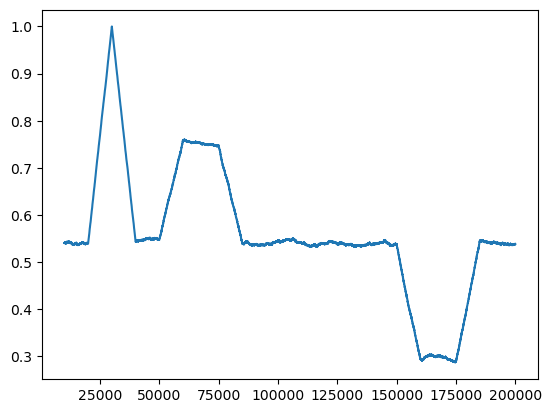

In [17]:
import matplotlib.pyplot as plt
plt.plot(data['y'].rolling(window=10000).mean())